![](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

In [1]:
import numpy as np
from tensorflow import keras


In [2]:

def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
  # + noise
  return series[..., np.newaxis].astype(np.float32)

In [3]:
generate_time_series(5,100).shape

(5, 100, 1)

When dealing with time series (and other types of sequences such
as sentences), the input features are generally represented as 3D
arrays of shape **[batch size, time steps, dimensionality**], where
dimensionality is 1 for univariate time series and more for multi‐
variate time series.

In [23]:
n_steps = 50
series = generate_time_series(10000, n_steps+1)
X_train, y_train = series[:7000,:n_steps], series[:7000,-1]
X_valid, y_valid = series[7000:9000,:n_steps], series[7000:9000,-1]
X_test, y_test = series[9000:,:n_steps], series[9000:,-1]

In [28]:
print(X_train.shape)
print(y_train.shape)
print(y_valid.shape)

(7000, 50, 1)
(7000, 1)
(2000, 1)


**BaseLine Model** Naive Forcasting

In [29]:
y_pred = X_valid[:,-1]

In [34]:
tf.reduce_mean((keras.losses.mean_squared_error(y_valid, y_pred))).numpy()

0.021166451

In [35]:
model = keras.Sequential([
                          keras.layers.Input(shape=[50,1]),
                          keras.layers.Flatten(),
                          keras.layers.Dense(1)
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='Adam', loss = keras.losses.mean_squared_error)
model.fit(X_train,y_train, validation_data=(X_valid,y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1770 - val_loss: 0.0677
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0536 - val_loss: 0.0374
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0255
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0198
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0163
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0081

**Implementing a Simple RNN**

In [11]:
import tensorflow as tf
tf.keras.backend.clear_session()
model = keras.Sequential([
                          keras.layers.SimpleRNN(10, input_shape=[None,1])
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='Adam', loss='mse')

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0924
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0365
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0260
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0215
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0187
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0167
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0152
Epoch 8/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0138
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0128
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0120
Epoch 11/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0113
Epoch 12/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0106
Epoch 13/20
219/219 [====

In [14]:
X_train.shape

(7000, 50, 1)

In [15]:
y_pred = model.predict(X_test)
np.mean(keras.losses.mean_squared_error(y_test, y_pred))

0.0077632405

![Deep RNN](https://stanford.edu/~shervine/teaching/cs-230/illustrations/deep-rnn-ltr.png?f57da6de44ddd4709ad3b696cac6a912)

In [16]:
#using Deep RNN
tf.keras.backend.clear_session()
model = keras.Sequential([
                          keras.layers.SimpleRNN(30, return_sequences=True, input_shape=[None,1]),
                          keras.layers.SimpleRNN(30, return_sequences=True),
                          keras.layers.SimpleRNN(1)
])

In [17]:
model.compile(optimizer='Adam', loss = tf.keras.losses.mean_squared_error)
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0135 - val_loss: 0.0045
Epoch 2/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 4/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 5/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 6/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 8/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 9/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 10/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0028 - val_lo

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred.shape

(1000, 1)

In [20]:
np.mean(keras.metrics.mean_squared_error(y_pred,y_test))

0.0025719877

1. Last layer is not ideal.
2. Last layers should have one neuron since we want a single output corresponding to single input.
3.Last layer does not make much difference since it has only one neuron, so it does not contribute much in training.
4.SimpleRNN uses tanh activation function which outputs values between -1 and 1. 
5. if we want to use other activation function, then we need to add dense layer in the last layer.
6. It decreases the training time

In [21]:
keras.backend.clear_session()
model = keras.Sequential([
                          keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
                          keras.layers.SimpleRNN(20),
                          keras.layers.Dense(1)
])

In [22]:
model.compile(optimizer='Adam', loss = tf.keras.losses.mean_squared_error)
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0124 - val_loss: 0.0041
Epoch 2/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 6/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 9/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0028 - val_lo

**Forecasting Several Time Steps Ahead**

1. If we want to predct next 10 timevalues, then we need to use 10 neurons at the output layer.
2. It can also be done using the 1 nueuron as discussed below.
 we will concatenate the next value predicted by above model with the input which will act as a input for the next value prediction and so on we can use same model 10 times to predict next 10 values

In [38]:
series = generate_time_series(1, n_steps + 10) #create a test input having 50+10 timestamps values.

In [64]:
X_new, y_new = series[:,:n_steps], series[:,n_steps:]

In [65]:
print(X_new.shape)
print(y_new.shape)

(1, 50, 1)
(1, 10, 1)


In [90]:
X = X_new

In [91]:
for steps in range(10):
  y_pred = model.predict(X[:, steps: steps + n_steps])
  X = np.concatenate((X, np.expand_dims(y_pred,axis=-1)) , axis=1)
  print(X.shape)

(1, 51, 1)
(1, 52, 1)
(1, 53, 1)
(1, 54, 1)
(1, 55, 1)
(1, 56, 1)
(1, 57, 1)
(1, 58, 1)
(1, 59, 1)
(1, 60, 1)


In [102]:
y_pred = X[:,50:61,:]

In [103]:
np.mean(keras.losses.mean_squared_error(y_pred,y_new))

0.0144159915

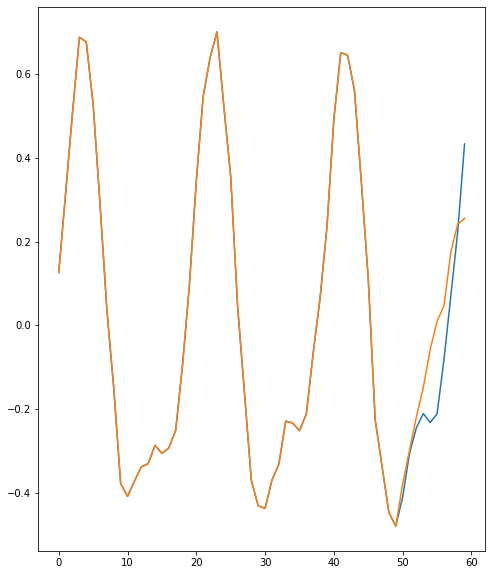

In [109]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
plt.plot(range(60),series[0,:,0])
plt.plot(range(60),X[0,:,0])
plt.show()

Second option is to train on 10 outputs and predict next 10 output.

In [112]:
series = generate_time_series(10000, n_steps+10)
X_train, y_train = series[:7000,:n_steps], series[:7000,n_steps:]
X_valid, y_valid = series[7000:9000,:n_steps], series[7000:9000,n_steps:]
X_test, y_test = series[9000:, :n_steps], series[9000:, n_steps:] 

In [113]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 50, 1)
(7000, 10, 1)
(1000, 50, 1)
(1000, 10, 1)


In [114]:
keras.backend.clear_session()

model = keras.Sequential([
                          keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
                          keras.layers.SimpleRNN(10),
                          keras.layers.Dense(10)
])

In [115]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 10)                310       
_________________________________________________________________
dense (Dense)                (None, 10)                110       
Total params: 860
Trainable params: 860
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(optimizer='Adam', loss = tf.keras.losses.mean_squared_error)
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0876 - val_loss: 0.0466
Epoch 2/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0379 - val_loss: 0.0309
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0270 - val_loss: 0.0249
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0209 - val_loss: 0.0189
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0176 - val_loss: 0.0162
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0156 - val_loss: 0.0149
Epoch 7/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0140 - val_loss: 0.0130
Epoch 8/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0130 - val_loss: 0.0136
Epoch 9/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0111 - val_lo

In [120]:
y_pred = model.predict(X_test)
np.mean(keras.losses.mean_squared_error(y_pred, y_test[:,:,0]))

0.009434746

In [119]:
y_pred.shape

(1000, 10)

This model works nicely: the MSE for the next 10 time steps is about 0.008. That’s
much better than the linear model. But we can still do better: indeed, instead of train‐
ing the model to forecast the next 10 values only at the very last time step, we can
train it to forecast the next 10 values at each and every time step. In other words, we
can turn this sequence-to-vector RNN into a sequence-to-sequence RNN. The advan‐
tage of this technique is that the loss will contain a term for the output of the RNN at
each and every time step, not just the output at the last time step. This means there
will be many more error gradients flowing through the model, and they won’t have to
flow only through time; they will also flow from the output of each time step. This
will both stabilize and speed up training

In [ ]:
#TODO
# Sequence to Sequence Generation